In [17]:
import torch
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

In [18]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-1_5", trust_remote_code=True)
data = pd.read_json("phi_entropies_tinystories_data.json")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [19]:
phi_layers, phi_heads = 24, 32
n = 20
avg_entropies = torch.zeros((phi_layers, phi_heads, n))
for storynum, story in enumerate(data):
    for layernum in range(phi_layers):
        # for a certain story and a certain layer:
        last_n_entropy = torch.Tensor(data[story][f'layer {layernum}']['last_n_entropy'])
        # print(last_n_entropy[0].shape)
        avg_entropies[layernum] += last_n_entropy[0]

avg_entropies /= (storynum+1)
        

In [20]:
# layer 0:
avg_entropies[0]


# layer 23:
# avg_entropies[-1]

tensor([[2.9480, 2.9166, 2.9371, 3.0045, 2.9767, 2.9759, 2.9790, 3.0246, 2.9596,
         2.9452, 3.0202, 2.9504, 2.9622, 2.9403, 2.9385, 2.9850, 2.9999, 2.9789,
         2.9980, 3.0111],
        [3.6544, 3.7147, 3.6866, 3.6722, 3.6508, 3.7052, 3.6781, 3.7361, 3.7124,
         3.7284, 3.7151, 3.7357, 3.7164, 3.7628, 3.7075, 3.7554, 3.7276, 3.7498,
         3.7564, 3.7589],
        [3.2202, 3.2126, 3.2241, 3.2284, 3.2324, 3.2349, 3.1945, 3.2102, 3.2239,
         3.2161, 3.2316, 3.2385, 3.2246, 3.2160, 3.2087, 3.2206, 3.2396, 3.2628,
         3.2403, 3.2320],
        [3.4003, 3.4777, 3.4474, 3.4089, 3.4734, 3.4955, 3.4904, 3.4720, 3.5091,
         3.4756, 3.4982, 3.5603, 3.5800, 3.5087, 3.5020, 3.4624, 3.5354, 3.5485,
         3.5047, 3.5837],
        [4.4168, 4.4258, 4.4243, 4.4456, 4.4437, 4.4543, 4.4440, 4.4500, 4.4540,
         4.4489, 4.4655, 4.4809, 4.4597, 4.4704, 4.4794, 4.4700, 4.4929, 4.4914,
         4.4944, 4.5074],
        [2.6296, 2.6168, 2.6850, 2.6423, 2.6062, 2.6057, 2.6

In [31]:
# averaging across heads
avg_entropies.shape # (24,32,20)
avg_entropies_avg_heads = torch.mean(avg_entropies, dim=-2) # (24,20)
avg_entropies_avg_heads

tensor([[3.0917, 3.1077, 3.1100, 3.1098, 3.1059, 3.1192, 3.1231, 3.1155, 3.1164,
         3.1183, 3.1295, 3.1348, 3.1354, 3.1418, 3.1418, 3.1351, 3.1466, 3.1525,
         3.1640, 3.1634],
        [2.5295, 2.5272, 2.5461, 2.5540, 2.5581, 2.5386, 2.5502, 2.5574, 2.5389,
         2.5377, 2.5481, 2.5378, 2.5538, 2.5481, 2.5477, 2.5549, 2.5632, 2.5715,
         2.5731, 2.5754],
        [2.0936, 2.0949, 2.1104, 2.1135, 2.1070, 2.0884, 2.0995, 2.1017, 2.0856,
         2.0945, 2.1019, 2.1007, 2.1053, 2.0980, 2.1002, 2.1099, 2.1123, 2.1171,
         2.1214, 2.1207],
        [2.2912, 2.2972, 2.3039, 2.3099, 2.3182, 2.3061, 2.3157, 2.3113, 2.3110,
         2.3134, 2.3132, 2.3143, 2.3243, 2.3266, 2.3142, 2.3242, 2.3292, 2.3328,
         2.3371, 2.3269],
        [2.2193, 2.2193, 2.2266, 2.2304, 2.2403, 2.2251, 2.2327, 2.2292, 2.2302,
         2.2294, 2.2355, 2.2331, 2.2386, 2.2360, 2.2332, 2.2403, 2.2423, 2.2461,
         2.2473, 2.2458],
        [2.1912, 2.1925, 2.2040, 2.2069, 2.2149, 2.2058, 2.2

In [35]:
# last token of each seq with heads averaged:
avg_entropies_avg_heads[:,-1]

tensor([3.1634, 2.5754, 2.1207, 2.3269, 2.2458, 2.2248, 2.4469, 2.4209, 2.5123,
        2.6914, 2.4750, 2.5396, 2.5280, 2.5297, 2.3422, 2.3650, 2.1499, 1.9979,
        1.8927, 1.8673, 1.9934, 1.8397, 1.7911, 1.0826])

In [24]:
import math
# maximum entropy for 100 length story:
def max_entropy(seq_len):
    a = torch.Tensor([1/seq_len for _ in range(seq_len)])
    max_a = -torch.sum(a*torch.log(a))
    print(f'maximum possible entropy of seq_len {seq_len}: {max_a}')

max_entropy(200)
max_entropy(20)

# figure out how to do this properly:
# # use base 2 for these preferably
# def percentage_analogy(seqlen, percentage):
#     ans = max_entropy(seqlen) - math.log(10)
#     print(f'for seqlen {seqlen}, a entropy of {ans} is analogous to {1-percentage} sparsity')

maximum possible entropy of seq_len 200: 5.298316955566406
maximum possible entropy of seq_len 20: 2.995732069015503


In [25]:
# calculate entropy as a ratio of the max entropy(use the story length):


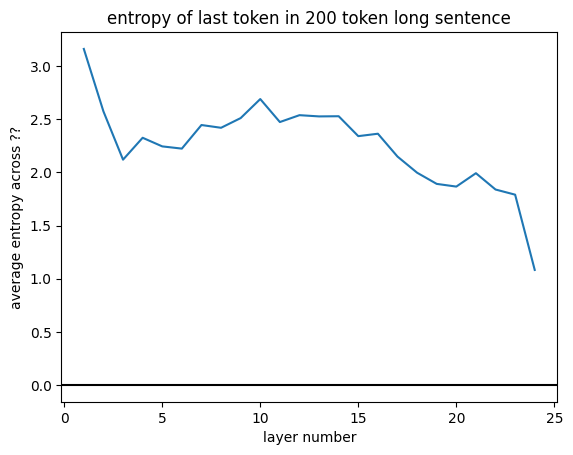

In [58]:
x = [i for i in range(1,25)]
y = avg_entropies_avg_heads[:,-1].tolist()
fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(x,y)
axes.set(title='entropy of last token in 200 token long sentence', xlabel='layer number', ylabel='average entropy across ??')
plt.axhline(0, c='k')
plt.show()

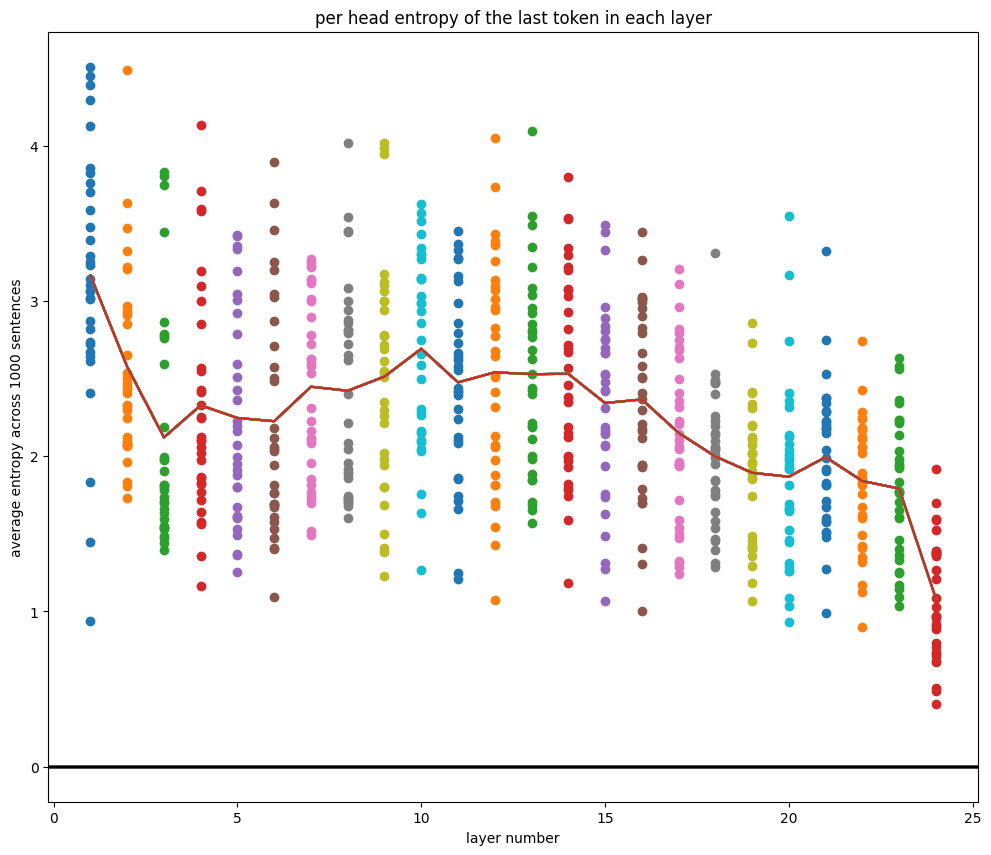

In [60]:
# avg_entropies.shape -> [24, 32, 20]
last_token_avg_entropies = avg_entropies[...,-1]
fig2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
for layernum,layer in enumerate(last_token_avg_entropies):
    # print(layer.shape)
    y2 = layer.tolist()
    axes2.scatter([layernum+1 for _ in range(len(y2))], y2)
    axes2.plot(x,y)
    axes2.set(title="per head entropy of the last token in each layer", xlabel='layer number', ylabel='average entropy across 1000 sentences')
    plt.axhline(0, c='k')
plt.show()



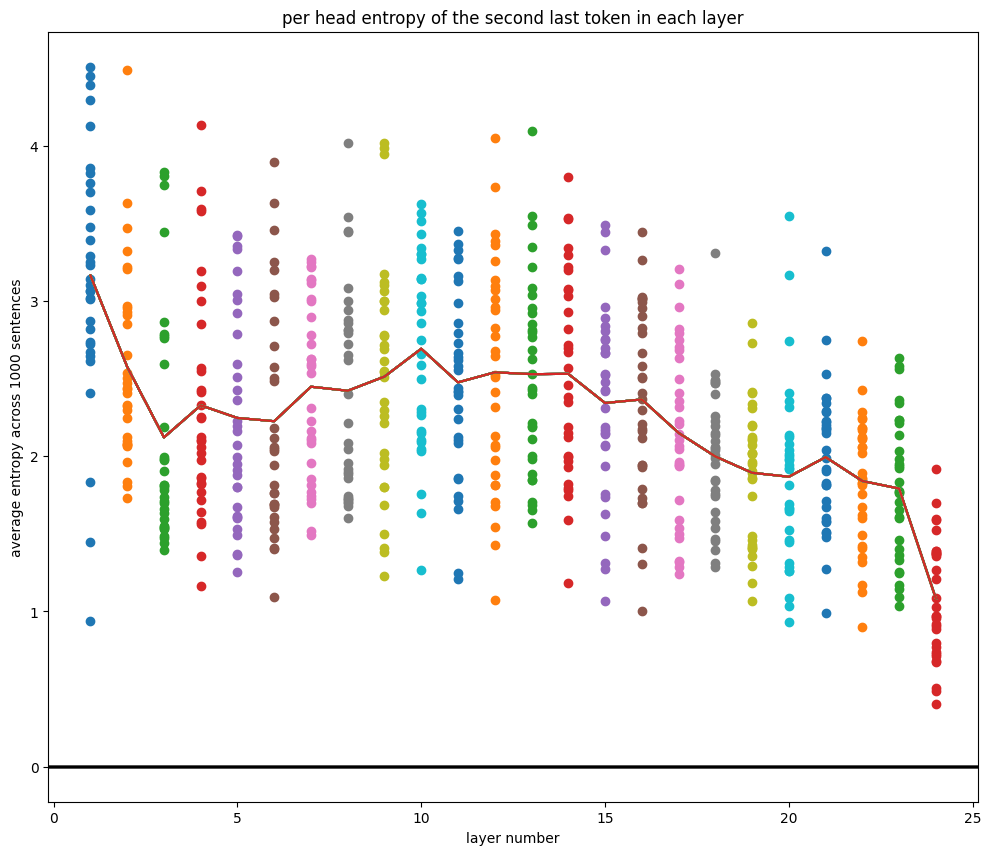

In [62]:
second_last_token_avg_entropies = avg_entropies[...,-1]
fig2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
for layernum,layer in enumerate(second_last_token_avg_entropies):
    # print(layer.shape)
    y2 = layer.tolist()
    axes2.scatter([layernum+1 for _ in range(len(y2))], y2)
    axes2.plot(x,y)
    axes2.set(title="per head entropy of the second last token in each layer", xlabel='layer number', ylabel='average entropy across 1000 sentences')
    plt.axhline(0, c='k')
plt.show()

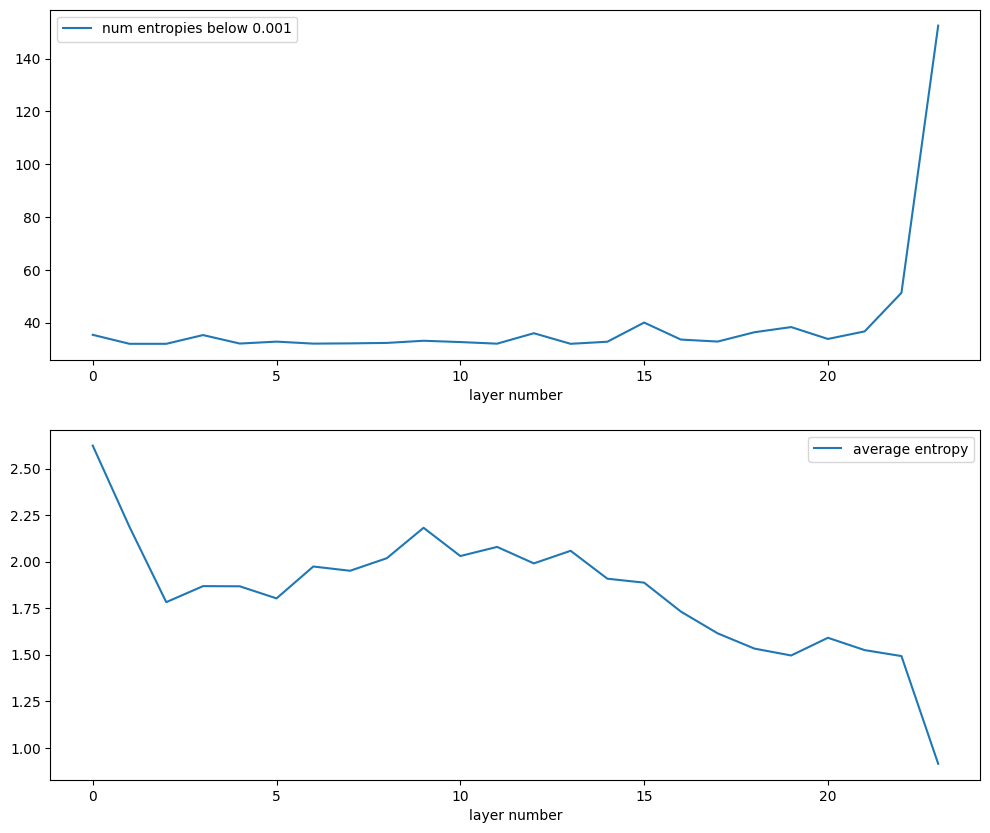

In [ ]:
# graph entropy along with the number of sub threshold probs to give credence that that is the thing causing the drop.
layers = [i for i in range(24)]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
axes[0].set(xlabel='layer number')
axes[0].plot(layers, avg_num, label='num entropies below 0.001')
axes[0].legend()

axes[1].set(xlabel='layer number')
axes[1].plot(layers, averages, label='average entropy')
axes[1].legend()

plt.show()